# 卷积神经网络Convolution Neural Network
** 简单介绍 **<br>
* CNN是一个模仿人类视觉原理的一个神经网络。
* 与全连接网络相比，CNN可以更大效率的降低参数的数量。
* 与全连接网络相比，CNN可以更好的提取图像的特征。

In [1]:
# 导入数据
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

E:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# 数据预处理
train_data = train_data.reshape(60000, 28, 28, 1)
train_data = train_data.astype("float32") / 255.
test_data = test_data.reshape(10000, 28, 28, 1)
x_test = test_data.astype("float32") / 255.

train_labels = to_categorical(train_labels)
y_test = to_categorical(test_labels)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, random_state=42, test_size=0.25)

## Simple CNN

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [5]:
model = Sequential()
# 第一层使用32个3*3的卷积核
# 要注意CNN的input层要注明通道数的
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 使用2*2的Maxpooling池化层
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Flatten层指的是将上面的卷积层的输出展平，以便后面可以作为全连接层的输入
model.add(Flatten())

In [6]:
# 先查看以上部分的网络的示意图
# 可得 7744=11*11*64是正确的，并且总共参数数量为18816
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 继续添加全连接层
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
# 很明显，我们只是添加了两层全连接层，一个64节点，一个10节点
# 然后参数已经到达了515,146的数量，远远大于卷积层的参数数量
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=128, epochs=20)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 8s 168us/step - loss: 0.2129 - acc: 0.9336 - val_loss: 0.0730 - val_acc: 0.9779
Epoch 2/20
45000/45000 [==============================] - 5s 116us/step - loss: 0.0575 - acc: 0.9820 - val_loss: 0.0650 - val_acc: 0.9809
Epoch 3/20
45000/45000 [==============================] - 5s 116us/step - loss: 0.0367 - acc: 0.9886 - val_loss: 0.0565 - val_acc: 0.9843
Epoch 4/20
45000/45000 [==============================] - 5s 117us/step - loss: 0.0259 - acc: 0.9920 - val_loss: 0.0560 - val_acc: 0.9863
Epoch 5/20
45000/45000 [==============================] - 5s 116us/step - loss: 0.0182 - acc: 0.9944 - val_loss: 0.0514 - val_acc: 0.9866
Epoch 6/20
45000/45000 [==============================] - 6s 130us/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0450 - val_acc: 0.9885
Epoch 7/20
45000/45000 [==============================] - 5s 116us/step - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0562 - 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 146us/step


In [14]:
# 经过了20个epoch，模型很快的达到了98.9%的准确率，如果更多点epoch或更深点的模型，达到100%也并非不可能
print(test_acc)

0.989


## 卷积网络是如何提取图片特征的？
* CNN通过局部视野，提取局部特征<br>
![title](images/extract_features.JPG)
* CNN据具有平移不变性，是全连接网络不具备的，即当一个物体的位置或形状发送了变化，DNN可能就无法准确的检测出来。
* CNN可以学习到空间层次的特征，可能在较浅的卷积层，学习到的是一些边缘线条，再之后更深的卷积层，学习到更多抽象的特征。
![title](images/spatial_hierarchies.JPG)
* 卷积是如何计算的，这个其实不难，可以看一下Andrew老师的CNN章节即可看懂。<br>

In [15]:
# 我们来查看模型中间的卷积层学习的特征
import matplotlib.pyplot as plt
from keras.models import Model

In [18]:
# 获取最后一个卷积层
conv2d_2_model = Model(inputs=model.input, outputs=model.get_layer("conv2d_2").output)

In [20]:
x_train[0].shape

(28, 28, 1)

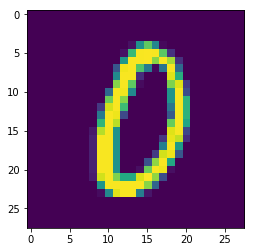

In [22]:
# 找一个样本
plt.imshow(x_train[0].reshape(28, 28))
plt.show()

In [23]:
pred_features = conv2d_2_model.predict(x_train[0].reshape(1, 28, 28, 1))

In [24]:
# 查看特征的shape, 是一个width=11, height=11, channel=64的feature map
pred_features.shape

(1, 11, 11, 64)

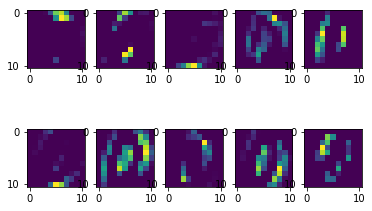

In [28]:
# 查看前10个特征, 由图中可以看到，每一个feature map所学习的特征大概都不相同，符合了局部特征的提取，最后进行空间层次的组合
for i in range(10):
    plt.subplot(2, 5, i+1) 
    plt.imshow(pred_features[0][:,:,i])
plt.show()

## LeNet-5
LeNet-5模型是Yann LeCun教授（卷积神经网络之父）在1998年提出的第一个成功应用在数字识别问题的卷积神经网络。<br>
LeNet-5总共有7层网络，如下图：
![title](images/LeNet-5.png)
* conv1: kernel_size: 5*5, filters=6, strides=1
* pool1: averagePooling, pool_size:2*2, strides=2
* conv2: kernel_size: 5*5, filters=16, strides=1
* pool2: averagePooling, pool_size=2*2, strides=2
* dense1: units：120
* dense2: units: 84
* dense3: units: 10

In [30]:
# 下面我们使用keras构建一个LeNet模型
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

In [31]:
def LeNet():
    '''
    这个LeNet-5版本可能与LeCun教授的论文不那么一致，如activation等，但都是遵从了大概的结构模型
    '''
    LeNet_5 = Sequential()
    LeNet_5.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', strides=1, input_shape=(28, 28, 1)))
    LeNet_5.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    LeNet_5.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', strides=1))
    LeNet_5.add(AveragePooling2D(pool_size=(2, 2), strides=2))
    LeNet_5.add(Flatten())
    LeNet_5.add(Dense(units=120, activation='relu'))
    LeNet_5.add(Dense(units=84, activation='relu'))
    LeNet_5.add(Dense(units=10, activation='softmax'))
    
    return LeNet_5

In [32]:
LeNet = LeNet()

In [33]:
LeNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164     
__________

In [35]:
LeNet.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# 训练
LeNet.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=128, epochs=10)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 6s 137us/step - loss: 0.4272 - acc: 0.8707 - val_loss: 0.1510 - val_acc: 0.9546
Epoch 2/10
45000/45000 [==============================] - 4s 79us/step - loss: 0.1232 - acc: 0.9629 - val_loss: 0.1272 - val_acc: 0.9583
Epoch 3/10
45000/45000 [==============================] - 4s 89us/step - loss: 0.0847 - acc: 0.9742 - val_loss: 0.0728 - val_acc: 0.9777
Epoch 4/10
45000/45000 [==============================] - 4s 80us/step - loss: 0.0658 - acc: 0.9801 - val_loss: 0.0658 - val_acc: 0.9794
Epoch 5/10
45000/45000 [==============================] - 4s 80us/step - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0774 - val_acc: 0.9755
Epoch 6/10
45000/45000 [==============================] - 4s 90us/step - loss: 0.0459 - acc: 0.9861 - val_loss: 0.0580 - val_acc: 0.9829
Epoch 7/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.0398 - acc: 0.9873 - val_loss: 0.0543 - val_ac

In [37]:
test_loss, test_acc = LeNet.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 117us/step


In [38]:
# 同样地，LeNet在10个epoch后在测试集上达到了98.78%的准确率，并且参数型对于上面的模型更少，且更深。
print(test_acc)

0.9878
